<a href="https://colab.research.google.com/github/HagarIbrahiem/Time-Series-Analysis-Forecasting/blob/main/2_eda_featureengineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libs & APIs

In [ ]:
!pip install gdown

## Load Data

In [ ]:
# https://drive.google.com/file/d/1o8LO0br8RMQ0B0Wu43RrTN9LiBvutd_4/view?usp=sharing

import gdown

# Google Drive file ID
file_id = '1o8LO0br8RMQ0B0Wu43RrTN9LiBvutd_4'

# Create the download URL
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the file
gdown.download(url, 'sales_data.parquet.gzip', quiet=False)


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1o8LO0br8RMQ0B0Wu43RrTN9LiBvutd_4
From (redirected): https://drive.google.com/uc?export=download&id=1o8LO0br8RMQ0B0Wu43RrTN9LiBvutd_4&confirm=t&uuid=c5997c49-323e-4d26-aa80-686f3f85377b
To: /kaggle/working/sales_data.parquet.gzip
100%|██████████| 698M/698M [00:03<00:00, 215MB/s] 


'sales_data.parquet.gzip'

In [ ]:
import pandas as pd

# Read the .gzip Parquet file into a DataFrame
_df = pd.read_parquet('sales_data.parquet.gzip')

# Check the data
_df.head()


,latitude,longitude,timestamp,product_id,quantity,total_amount
0,23.669917,-97.455367,2023-10-05,1006,1.0,84.35
1,23.659791,-97.396217,2023-10-05,1172,2.0,198.84
2,23.674743,-97.357560,2023-10-05,1192,12.0,2706.72
3,23.718871,-97.196633,2023-10-05,1246,1.0,332.16
4,18.965386,-86.610368,2023-10-05,27,1.0,16.08


In [ ]:
df= _df.copy()

# Feature Engineering

calculate the **total sales** `quantity * total_amount` for each day.

In [ ]:
# Add a new column for total sales (quantity * total_amount)
df['total_sales'] = df['quantity'] * df['total_amount']

# Exploratory Data Analysis (EDA)

**Basic Time Series Trends**

Visualizing overall sales trends over time to identify if there are any obvious upward/downward trends in sales across the full dataset.


In [ ]:
# Extract just the date (no time component) to group by day
df['date'] = df['timestamp'].dt.date

# Group by date and sum total sales
daily_sales = df.groupby('date')['total_sales'].sum()
daily_sales.head()

In [ ]:
# Top 5 days with highest total sales
top_5_sales = daily_sales.sort_values(ascending=False).head(5)
top_5_sales

date
2024-05-25    4.813490e+09
2024-06-29    3.887414e+09
2024-07-13    2.921147e+09
2024-07-06    2.909310e+09
2023-12-31    2.519412e+09
Name: total_sales, dtype: float64

📈 **Top 5 Days with Highest Sales**

**May 25, 2024**
- Likely Event: Memorial Day Weekend (Observed May 27 in 2024)
- Insight: Major retail promotions and travel-related purchases tend to spike during Memorial Day weekend. It's considered the unofficial start of summer.

**June 29, 2024**
- Likely Event: Lead-up to Fourth of July
- Insight: Many people shop ahead of Independence Day for parties, BBQs, and travel. Sales of food, drink, and decorations peak.

**July 13, 2024 and July 6, 2024**
- Likely Events: Post-Independence Day shopping, mid-summer sales
- Insight: Retailers often run clearance or "Black Friday in July" promotions. July 6 is right after July 4th, so some delayed impact is expected.

**December 31, 2023**
- Likely Event: New Year's Eve
- Insight: High sales driven by party supplies, alcohol, and last-minute year-end purchases.

In [ ]:

# Bottom 5 days with lowest total sales
bottom_5_sales = daily_sales.sort_values(ascending=True).head(5)
bottom_5_sales

date
2024-01-29    1.614240e+07
2024-02-06    1.663157e+07
2024-01-30    1.824761e+07
2024-02-07    2.034354e+07
2024-02-13    2.110290e+07
Name: total_sales, dtype: float64

📉 **Bottom 5 Days with Lowest Sales**

**January 29 & 30, 2024, and February 6, 7, 13, 2024**

- Likely Reason: Post-Holiday Lull / Early-Year Consumer Austerity
- Insight: This is the quietest retail period in the Consumers often reduce spending after heavy holiday shopping in November–December. There's also typically less promotional activity from retailers during this time.
- Additionally, these dates fall on weekdays (likely Mondays or Tuesdays), which are generally lower-performing sales days.



### EDA - Visualize sales patterns over time.


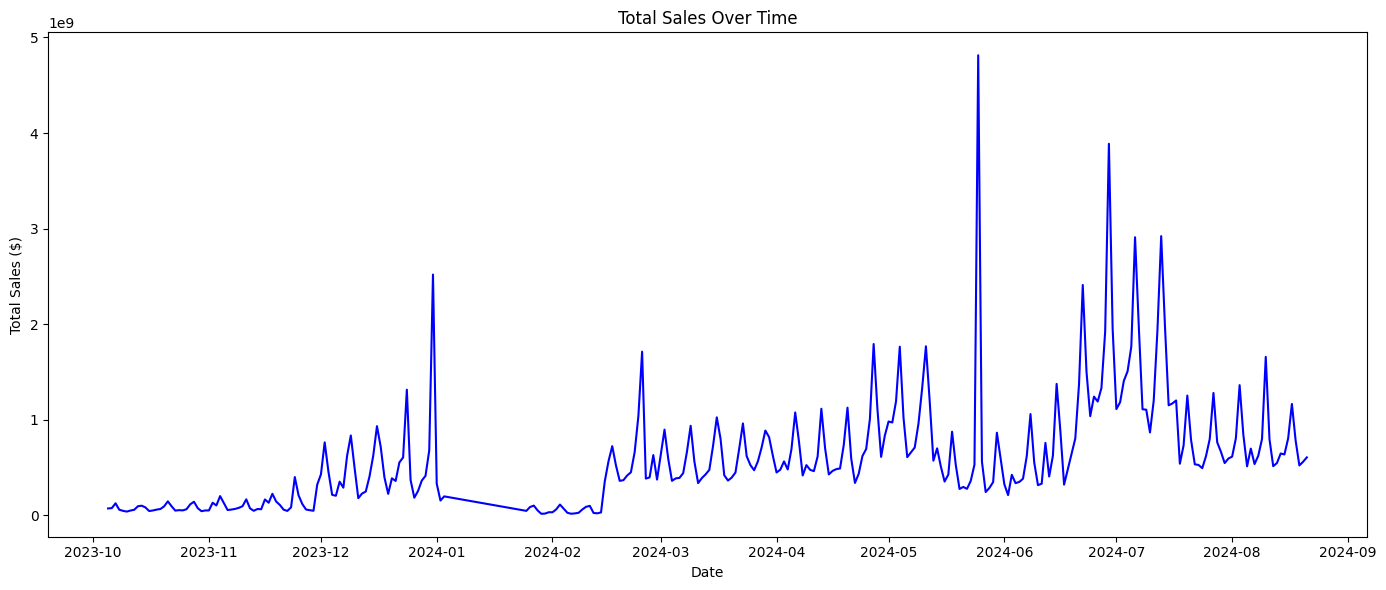

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
daily_sales.plot(title='Total Sales Over Time', xlabel='Date', ylabel='Total Sales ($)', color='blue')
plt.tight_layout()
plt.show()

📊 **Visual Trend Summary (based on the plot)**

🔁 1. Seasonality (Weekly Pattern)
- Weekend Peaks: there is a clear weekly seasonality in the data,Regular peaks occur once every 7 days, followed by a drop. consumers typically shop more on weekends, which could explain recurring mini-peaks across weeks.

📈 2. Trend
- From late December 2023 to early February 2024, the sales activity remained relatively flat, with no noticeable increase or decrease.
- Starting around mid-February, there is a gradual upward shift, where both the weekly highs and lows start to rise slightly. This indicates a steady growth in sales volume over time.
- By late May 2024, there is a sudden and sharp increase in sales, suggesting a possible event, or external factor that caused a major spike.
- After this point, the overall sales level stays consistently higher than before, indicating a new baseline with more frequent spikes and dips ,reflecting a higher and more active market.

⚠️ 3. Anomalies
- May 25, 2024: Very clear positive anomaly, highest spike in the whole period. Far exceeds regular weekly peaks.
- June 29, 2024: Another abnormally high spike, well above surrounding weeks.
- A few other noticeable one-off spikes:
    - Around early July 2024 (post-June 29).
    - December 31, 2023 also stands out relative to its flat surroundings.
    - Early January and Early February 2024: Appear as negative anomalies, valleys deeper than typical troughs.

🔄 4. Volatility Change
- From February to May 2024, the gap between peaks and troughs increases gradually.
- After May 2024, this volatility becomes even more pronounced.
- So, the data suggests not just a rising trend, but also rising variability.

### EDA - Examine the dataset for trends, seasonality, and anomalies


**Let's examine the three main components in more detail.**

#### Step 1: Trend Analysis
We’ll smooth the sales data using a 7-day rolling average to see the general direction

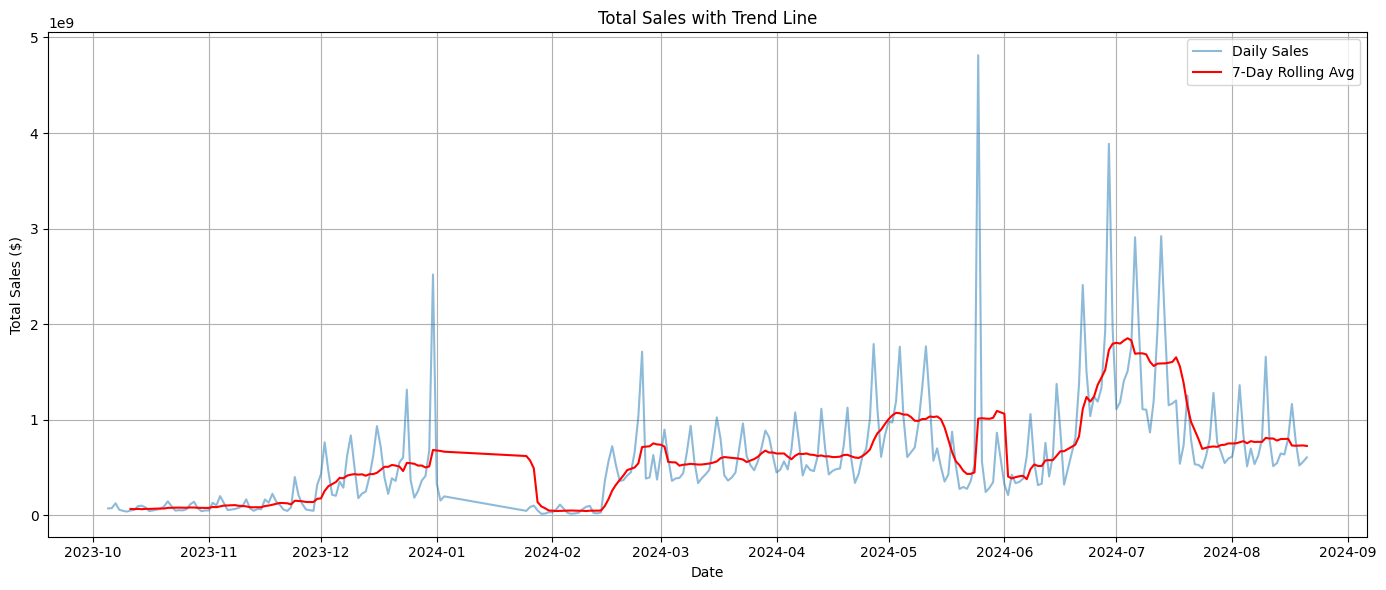

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `daily_sales` is a Pandas Series with datetime index
daily_sales.index = pd.to_datetime(daily_sales.index)
rolling_avg = daily_sales.rolling(window=7).mean()

plt.figure(figsize=(14, 6))
plt.plot(daily_sales, label='Daily Sales', alpha=0.5)
plt.plot(rolling_avg, label='7-Day Rolling Avg', color='red')
plt.title('Total Sales with Trend Line')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### ✅ Step 2: Seasonality Detection

**A. Day of Week Patterns**

Let’s check if sales vary by weekday.

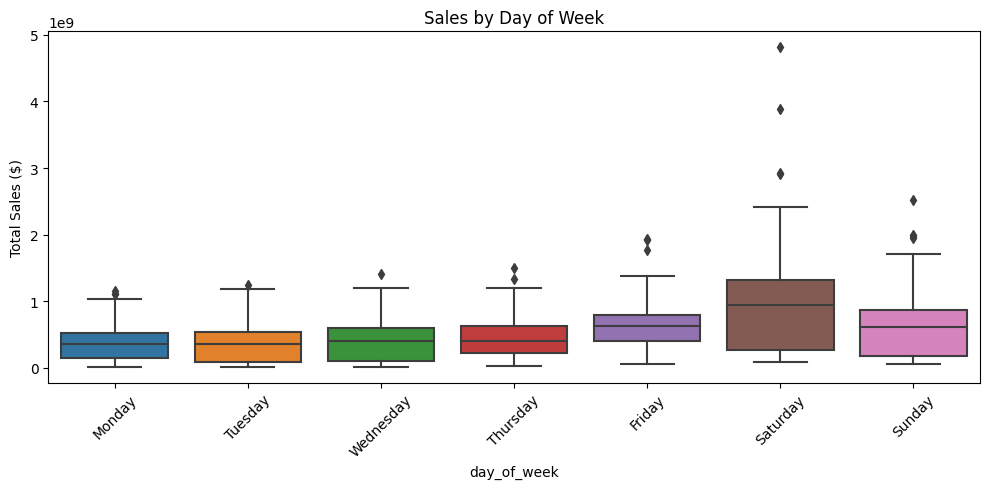

In [ ]:
# Extract day of week
df = daily_sales.reset_index()
df.columns = ['date', 'sales']
df['day_of_week'] = df['date'].dt.day_name()

# Boxplot
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='day_of_week', y='sales', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Sales by Day of Week')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


📊 **Weekday Sales Pattern Analysis**
- Saturday clearly shows the highest median sales, with a wide range and many high-value outliers. This indicates a peak in consumer activity , likely due to weekend shopping.
- Sunday follows Saturday with relatively high sales, though less than Saturday. It's still part of the weekend effect.
- Monday to Friday exhibit lower and more consistent sales, with Wednesday and Thursday being the lowest in terms of both median and upper spread.
- Outliers on Saturdays (and to some extent Fridays and Sundays) suggest occasional promotional spikes or special events driving sales.

**B. Month-over-Month Patterns**

We’ll visualize seasonality by month:

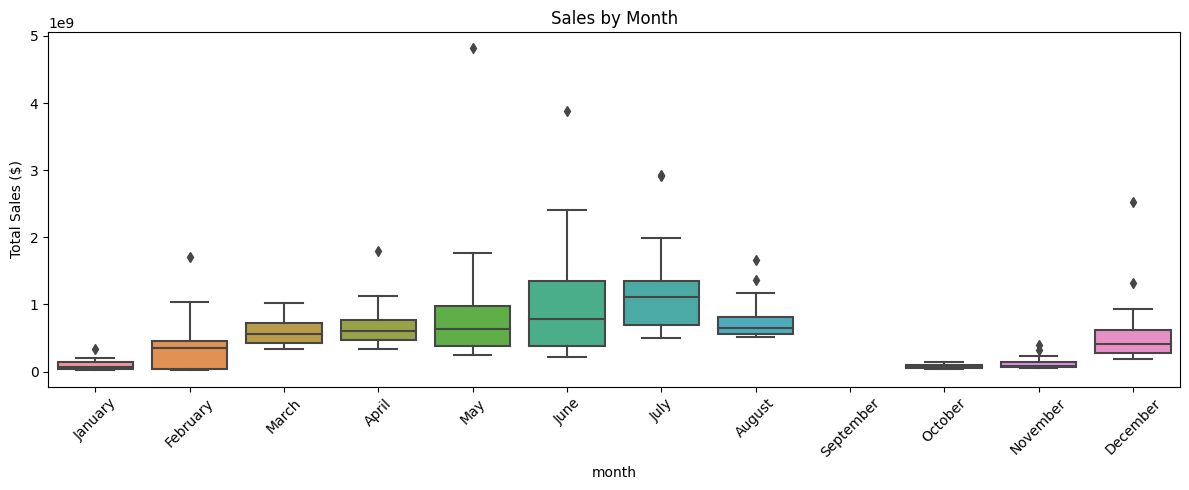

In [ ]:
df['month'] = df['date'].dt.month_name()

plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='month', y='sales',
            order=['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Sales by Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


📅 **Month-over-Month Sales Seasonality Analysis**

- Peak Sales Months: June and July show the highest median and spread in total sales, with significant outliers. These likely reflect seasonal campaigns or fiscal year-end spending spikes.
- Strong Performance: May and August also show robust sales activity, with relatively high medians and moderate variability.
- Holiday Effect: December sees a noticeable uptick, possibly due to end-of-year promotions or holiday shopping.
- Low Activity Months: September, October, and November have the lowest sales, with tight distributions and low outliers,indicating a potential off-season or slowdown in demand.
- Early-Year Growth: A steady month-over-month rise from January to May, suggesting gradual post-holiday recovery and ramp-up toward mid-year.


#### ✅ Step 3: Anomaly Detection
We’ll highlight days with unusually high/low sales using Z-scores:

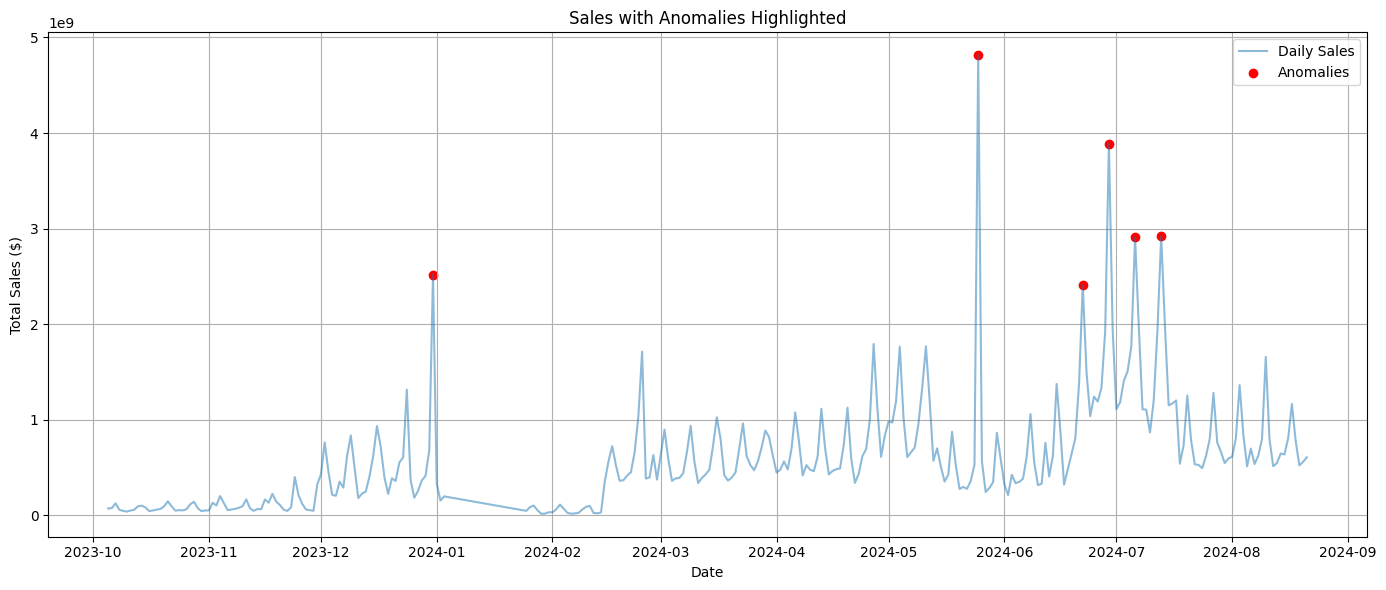

In [ ]:
from scipy.stats import zscore

df['zscore'] = zscore(df['sales'])

# Set a threshold for anomalies
anomalies = df[(df['zscore'] > 3) | (df['zscore'] < -3)]

plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['sales'], label='Daily Sales', alpha=0.5)
plt.scatter(anomalies['date'], anomalies['sales'], color='red', label='Anomalies')
plt.title('Sales with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📊 **Anomalies in Daily Sales – Insights & Implications**

- Anomalies Identified:
6 distinct spikes (red dots) are flagged as anomalies, representing sudden surges in daily sales that deviate significantly from the normal pattern.

🔍 **Detailed Observations:**
- Late December / Early January Spike:  Likely tied to holiday season or year-end promotions, Suggesting strong seasonal buying behavior.
- Mid-to-Late May Peak : The highest spike overall,could indicate a major campaign, launch, or bulk transaction.
- June–July Cluster (multiple anomalies) : Frequent spikes in this range imply recurring promotions or customer acquisition pushes. Indicates a seasonally strategic sales window,
potential to optimize marketing during this time.